#### **Course**        :   DSC530-T303 Data Exploration and Analysis (2243-1)
#### **Assignment**    :   Week 12: Term Project: Data Exploration and Analysis
#### **Author**        :   Ramesh Talapaneni
#### **Instructor**    :   Amirfarrokh Iranitalab
#### **Date**          :   03/01/2024

# **Dataset**
---

## Source 

- **[Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data)**

## Fields

- **RowNumber** — corresponds to the record (row) number and has no effect on the output.
- **CustomerId** — contains random values and has no effect on customer leaving the bank.
- **Surname** — the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography** — a customer's location can affect their decision to leave the bank.
- **Gender** — it's interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts** — refers to the number of products that a customer has purchased through the bank.
- **HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember** — active customers are less likely to leave the bank.
- **EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited** — whether or not the customer left the bank.
- **Complain** — customer has complaint or not.
- **Satisfaction Score** — Score provided by the customer for their complaint resolution.
- **Card Type** — type of card hold by the customer.
- **Points Earned** — the points earned by the customer for using credit card.

## **Acknowledgements**

1. As we know, it is much more expensive to sign in a new client than keeping an existing one.

2. It is advantageous for banks to know what leads a client towards the decision to leave the company.

3. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

_**Source**: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data_

# **Load the dataset**
---

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Customer-Churn-Records.csv'
churn_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# **List out the columns in the dataset**
---

In [2]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

# **TODO**
---
1. Select the variables to be analyzed.
2. Describe these variables in the context of the dataset.
3. Create histograms for each of the selected variables to understand their distribution and identify any outliers.
4. Calculate the descriptive statistics for these variables, including mean, mode, spread, and tails.
5. Compare two scenarios using a Probability Mass Function (PMF).
6. Create a Cumulative Distribution Function (CDF) for one of the variables.
7. Plot an analytical distribution for one of the variables.
8. Create scatter plots to analyze correlations and causation between pairs of variables.
9. Conduct hypothesis testing.
10. Perform regression analysis.

## Step 1: **Select the variables to be analyzed**
---
Selected variables: **CreditScore**, **Age**, **Balance**, **NumOfProducts** and **IsActiveMember**.

In [3]:
# Selecting the five variables for analysis
variables_to_analyze = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']

## Step 2: **Describe these variables in the context of the dataset**
---
Based on the description provided and the relevance to customer churn, I am selecting the following variables:

- **CreditScore**: A numerical indicator of a customer's creditworthiness.
- **Age**: The age of the customer, which could influence their decision to stay with or leave the bank.
- **Balance**: The current balance in the customer's account.
- **NumOfProducts**: The number of products the customer has purchased from the bank.
- **IsActiveMember**: Whether the customer is an active member.

These variables are likely to have an impact on customer churn and will be the focus of our initial analysis.

## Step 3: **Create histograms for each of the selected variables to understand their distribution and identify any outliers**
---

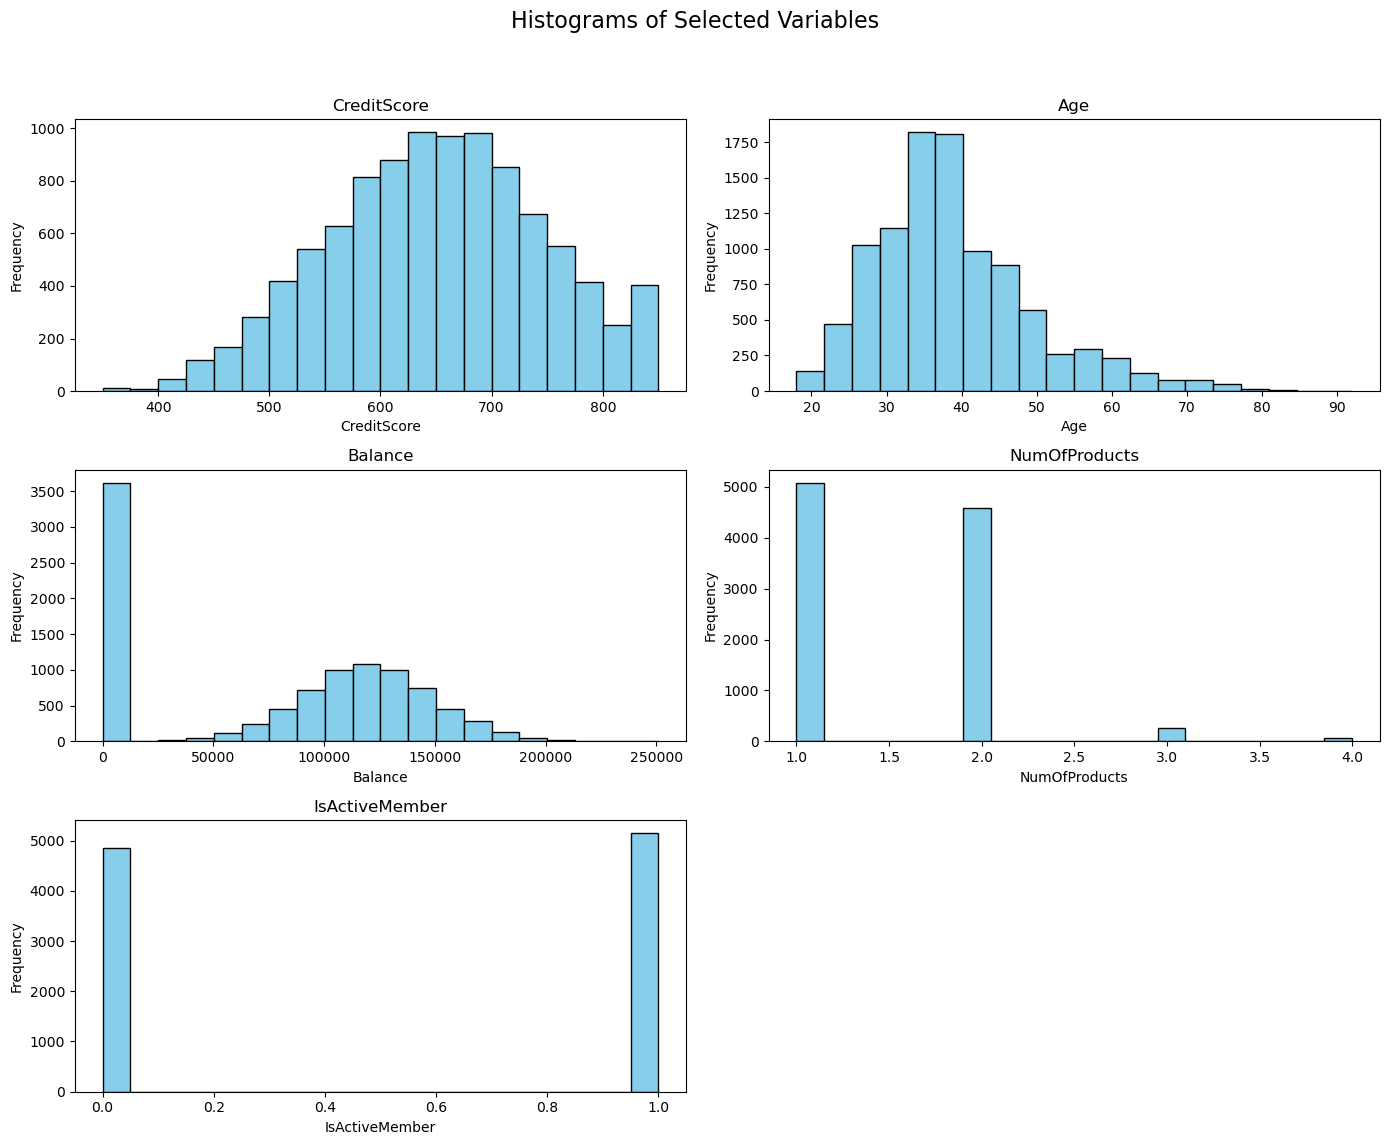

In [4]:
import matplotlib.pyplot as plt


# Plotting histograms for each of the selected variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Histograms of Selected Variables', fontsize=16)
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(variables_to_analyze):
    axes[i].hist(churn_data[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

# Remove the last empty subplot (if the number of variables is odd)
if len(variables_to_analyze) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout
plt.show()

### **Report on histograms**
1. **CreditScore**: The distribution seems to be fairly normal, with no significant skewness. There do not appear to be outliers that would significantly affect analysis.
2. **Age**: This histogram shows that the distribution of age is slightly right-skewed, indicating that there are older customers but the majority are younger.
3. **Balance**: The balance distribution has a large peak at zero, indicating a substantial number of customers with no balance. There's also a fairly uniform distribution of balances among the rest of the customers.
4. **NumOfProducts**: Most customers have one or two products with the bank. There are fewer customers with three or four products, and these could be considered outliers.
5. **IsActiveMember**: There are two distinct bars, indicating the binary nature of this variable (active vs non-active members).

## Step 4: **Calculate the descriptive statistics for these variables, including mean, mode, spread, and tails**
---

In [5]:
# Calculating descriptive statistics for the selected variables
descriptive_stats = churn_data[variables_to_analyze].describe()
descriptive_stats.loc['mode'] = churn_data[variables_to_analyze].mode().iloc[0]
descriptive_stats.loc['variance'] = churn_data[variables_to_analyze].var()
descriptive_stats.loc['skew'] = churn_data[variables_to_analyze].skew()
descriptive_stats.loc['kurtosis'] = churn_data[variables_to_analyze].kurtosis()

# Display the descriptive statistics
descriptive_stats

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,650.528800,38.921800,7.648589e+04,1.530200,0.515100
std,96.653299,10.487806,6.239741e+04,0.581654,0.499797
min,350.000000,18.000000,0.000000e+00,1.000000,0.000000
25%,584.000000,32.000000,0.000000e+00,1.000000,0.000000
50%,652.000000,37.000000,9.719854e+04,1.000000,1.000000
75%,718.000000,44.000000,1.276442e+05,2.000000,1.000000
max,850.000000,92.000000,2.508981e+05,4.000000,1.000000
mode,850.000000,37.000000,0.000000e+00,1.000000,1.000000
variance,9341.860157,109.994084,3.893436e+09,0.338322,0.249797


### Descriptive statistics for the selected variables

  - **CreditScore**
      - Mean: 650.53
      - Mode: 850
      - Variance: 9341.86
      - Skewness: -0.071 (slightly left-skewed)
      - Kurtosis: -0.426 (light-tailed)
  - **Age**
      - Mean: 38.92
      - Mode: 37
      - Variance: 109.99
      - Skewness: 1.011 (right-skewed)
      - Kurtosis: 1.395 (heavier tails than a normal distribution)
  - **Balance**
      - Mean: 76,485.89
      - Mode: 0.00 (a significant number of customers with zero balance)
      - Variance: 3,893,436,000.00
      - Skewness: -0.141 (slightly left-skewed)
      - Kurtosis: -1.489 (light-tailed)
  - **NumOfProducts**
      - Mean: 1.53
      - Mode: 1
      - Variance: 0.338
      - Skewness: 0.746 (right-skewed)
      - Kurtosis: 0.583 (light-tailed)
  - **IsActiveMember**
      - Mean: 0.515
      - Mode: 1
      - Variance: 0.25
      - Skewness: -0.060 (slightly left-skewed)
      - Kurtosis: -1.997 (light-tailed)

### From the above, we can note:

- **CreditScore** appears to have a normal distribution with the majority of customers having a high credit score, indicated by the mode being at the maximum score of 850.
- **Age** has a right skew, meaning there are more young customers than old, but there is a significant presence of older customers as well, which could affect churn.
- **Balance** has a large number of customers with no balance, which can be an important factor in churn analysis. It's also slightly skewed to the left, indicating more customers with lower balances.
- **NumOfProducts** shows that most customers have one product, with few having three or four, which are outliers.
- **IsActiveMember** is fairly balanced but slightly skewed to the left, indicating there are slightly more active members than inactive.

## Step 5: **Compare two scenarios using a Probability Mass Function (PMF)**
---

- Probability Mass Function (PMF) helps to show the distribution of discrete variables.
- Let's compare the PMF of the number of products for customers who exited vs. those who stayed.
  - First, we separate the customers who exited and those who stayed.
  - Calculate the PMF for the number of products for both groups.
  - Finally, we plot the PMFs.

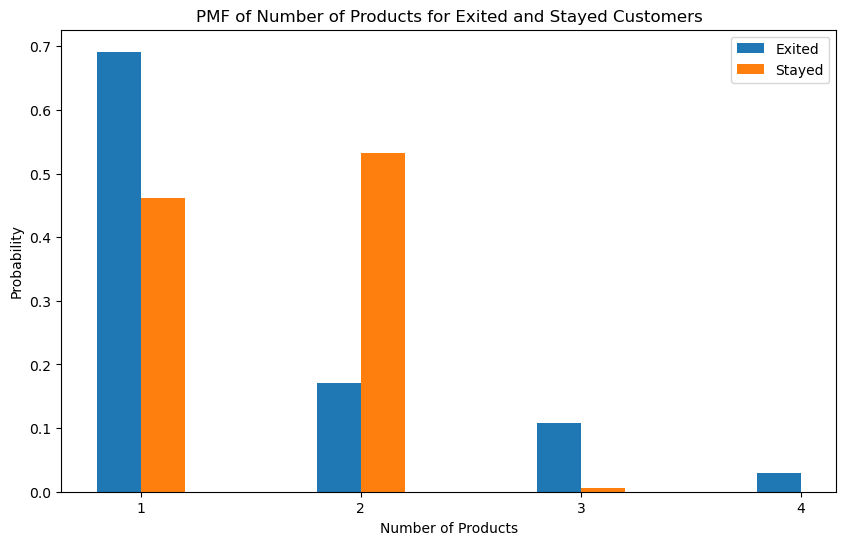

In [6]:
import numpy as np

# Separation of the customers into categories; "who exited" and those "who stayed"
exited_customers = churn_data[churn_data['Exited'] == 1]
stayed_customers = churn_data[churn_data['Exited'] == 0]

# Calculation of the PMF for the number of products (for both groups)
num_products_exited = exited_customers['NumOfProducts'].value_counts().sort_index() / len(exited_customers)
num_products_stayed = stayed_customers['NumOfProducts'].value_counts().sort_index() / len(stayed_customers)

# Plot the PMFs
plt.figure(figsize=(10, 6))
plt.bar(num_products_exited.index - 0.1, num_products_exited.values, width=0.2, label='Exited')
plt.bar(num_products_stayed.index + 0.1, num_products_stayed.values, width=0.2, label='Stayed')
plt.xlabel('Number of Products')
plt.ylabel('Probability')
plt.title('PMF of Number of Products for Exited and Stayed Customers')
plt.xticks(num_products_exited.index)
plt.legend()
plt.show()

### **Report of comparison between customer `who exited` vs. those `who stayed`**

The Probability Mass Function (PMF) comparison between customers who exited and those who stayed, based on the number of products they have, shows us the following:

- Customers with two products have a higher probability of staying with the bank.
- The probability of exiting increases significantly for customers with three products.
- Very few customers have four products, but this group shows a higher likelihood of churn compared to those with fewer products.

This suggests that the number of products a customer has with the bank is related to their decision to stay or leave, with a notable increase in churn risk for those with three products.

## Step 6: **Create a Cumulative Distribution Function (CDF) for one of the variables**
---

Let's select the **Age** variable for this analysis, as it is continuous and relevant to churn.

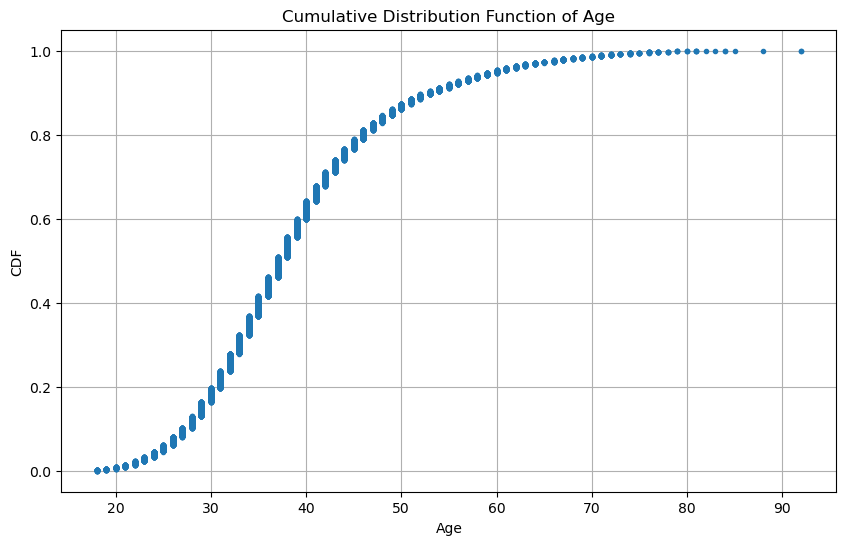

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF

# Create an ECDF (Empirical-CDF) for the Age variable
ecdf = ECDF(churn_data['Age'])

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Age')
plt.grid(True)
plt.show()

In [8]:
ages = dict()
for age in ecdf.x:
  ages[age] = ages.get(age, 0)
  ages[age] += 1

max_age, customer_count = sorted(list(ages.items()), key=lambda x: x[1])[-1]
total_customer_count = sum(ages.values())
below_max_age = sum(count if (age > 0 and age <= max_age) else 0 for age, count in ages.items())
print(f"{(below_max_age/total_customer_count) * 100}% has age {max_age}.")

below_50_age = sum(count if (age > 0 and age <= 50) else 0 for age, count in ages.items())
print(f"{(below_50_age/total_customer_count) * 100}% has age less than or equal to 50.")

50.86491350864913% has age 37.0.
87.38126187381262% has age less than or equal to 50.


The Cumulative Distribution Function (CDF) for **Age** shows that:

- Approximately 50% of the customers are aged 37 or younger.
- About 90% of the customers are aged 50 or younger.
- The CDF increases steadily with age, indicating a smooth distribution without abrupt changes, which could suggest there are no significant age groups that are underrepresented in the dataset.

## Step 7: **Plot an analytical distribution for one of the variables**
---

- For this, we'll fit a normal distribution to the **CreditScore** variable since it seems to be normally distributed based on the _histogram_.
- We'll then generate a probability density function (PDF) to compare with the histogram.

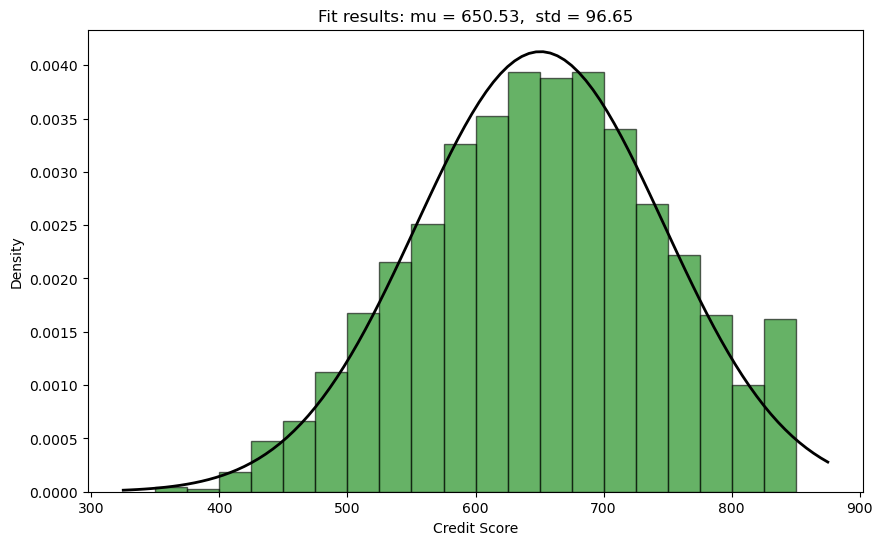

In [9]:
from scipy.stats import norm

# Fit a normal distribution to the Credit Score data
mu, std = norm.fit(churn_data['CreditScore'])

# Plot the histogram for Credit Score
plt.figure(figsize=(10, 6))
plt.hist(churn_data['CreditScore'], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.show()

The _histogram_ of the **CreditScore** variable, overlaid with the probability density function (PDF) of the fitted normal distribution, indicates a good fit. The parameters of the fitted normal distribution are:

- Mean (μ): 650.53
- Standard Deviation (σ): 96.65

The distribution appears to be roughly normal, although there are some deviations, particularly in the tails, which could be due to the presence of customers with very high or low credit scores.


## Step 8: **Create scatter plots to analyze correlations and causation between pairs of variables**
---
- Let's examine how **CreditScore** and **Age** might correlate with the **Balance** variable.
- Then, let's create two scatter plots and calculate Pearson's correlation coefficient for each pair.

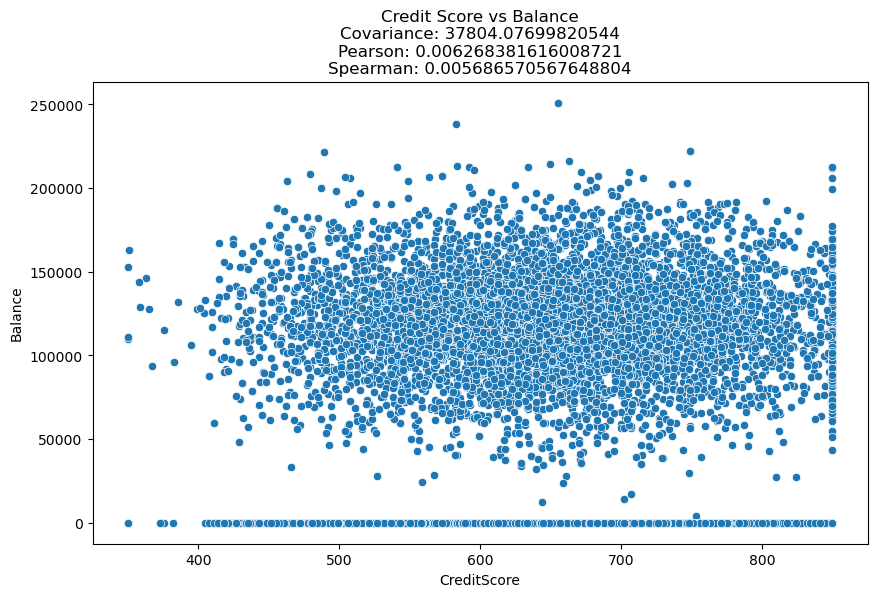

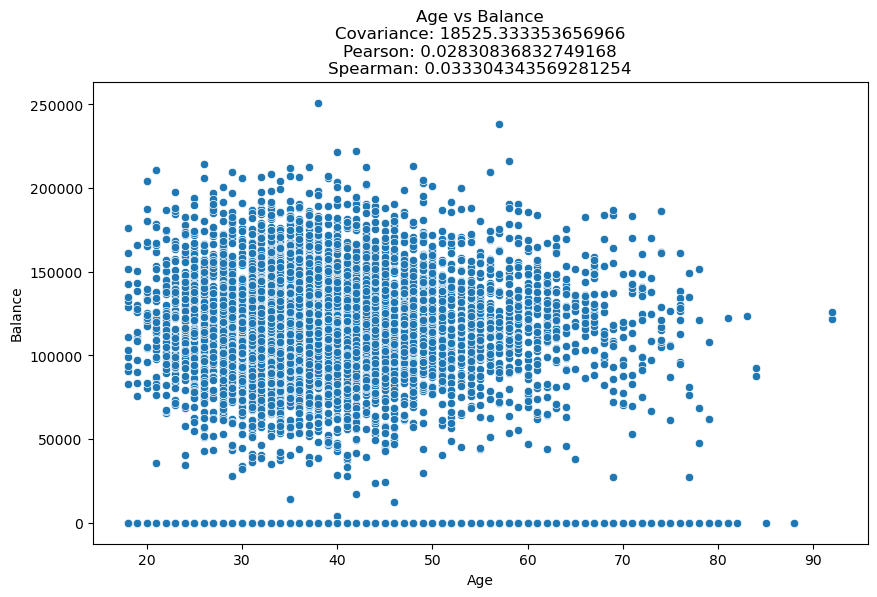

In [10]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

##### Scatter plot for 'Credit Score' vs 'Balance' #####

# Calculate covariance for 'Credit Score' and 'Balance'
credit_balance_cov = churn_data['CreditScore'].cov(churn_data['Balance'])

# Calculate Pearson's correlation coefficient for 'Credit Score' and 'Balance'
credit_balance_corr, _ = pearsonr(churn_data['CreditScore'], churn_data['Balance'])

# Calculate Spearman's rank correlation for non-linear but monotonic relationships
credit_balance_spearman_corr, _ = spearmanr(churn_data['CreditScore'], churn_data['Balance'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='Balance', data=churn_data)
plt.title(f'Credit Score vs Balance\nCovariance: {credit_balance_cov}\nPearson: {credit_balance_corr}\nSpearman: {credit_balance_spearman_corr}')
plt.show()

##### Scatter plot for 'Age' vs 'Balance' #####

# Calculate covariance for 'Age' and 'Balance'
age_balance_cov = churn_data['Age'].cov(churn_data['Balance'])

# Calculate Pearson's correlation coefficient for 'Age' and 'Balance'
age_balance_corr, _ = pearsonr(churn_data['Age'], churn_data['Balance'])

# Calculate Spearman's rank correlation for non-linear but monotonic relationships
age_balance_spearman_corr, _ = spearmanr(churn_data['Age'], churn_data['Balance'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', data=churn_data)
plt.title(f'Age vs Balance\nCovariance: {age_balance_cov}\nPearson: {age_balance_corr}\nSpearman: {age_balance_spearman_corr}')
plt.show()

The scatter plots and Pearson's correlation coefficients provide the following insights:

1. _**Credit Score vs. Balance**_:
    - The scatter plot does not show a clear pattern, suggesting a weak relationship between **CreditScore** and **Balance**.
    - The Pearson's correlation coefficient is approximately `0.0063`, confirming the lack of a strong linear relationship between these two variables.

2. _**Age vs. Balance**_:
    - Similar to **CreditScore**, the scatter plot for _Age vs. Balance_ does not display a distinct linear trend.
    - The Pearson's correlation coefficient is approximately `0.0283`, which is also very low, indicating a weak linear relationship between **Age** and **Balance**.

These results suggest that neither **CreditScore** nor **Age** has a strong linear relationship with the Balance of the customers. This could imply that other factors not explored in these scatter plots may have a more significant influence on the **Balance** variable.

## Step 9: **Conduct hypothesis testing**
---

Variations in hypothesis testing:
- **Hypothesis Testing**: Compare the mean balance of customers who exited vs. those who stayed.
- **Null hypothesis (H0)**: There is no difference in _mean balance_ between the two groups.
- **Alternative hypothesis (H1)**: There is a difference in _mean balance_ between the two groups.

For _hypothesis testing_, i.e., we could test whether the _average balance_ is significantly different between customers _who exited_ and those _who stayed_.

In [11]:
from scipy.stats import ttest_ind

# Separate the balance data for exited and stayed customers
balance_exited = churn_data[churn_data['Exited'] == 1]['Balance']
balance_stayed = churn_data[churn_data['Exited'] == 0]['Balance']

# Perform the t-test
t_stat, p_value = ttest_ind(balance_exited, balance_stayed)

# Display the results
t_stat, p_value

(11.940747722508185, 1.2092076077156017e-32)

The results of the hypothesis testing comparing the mean balance of customers who exited versus those who stayed are as follows:

- **T-statistic**: $11.941$
- **P-value**: approximately $(1.21 \times 10^{-32})$

With such a small p-value, we reject the null hypothesis that there is no difference in mean balance between the two groups. The test result suggests that there is a statistically significant difference in the mean balance of customers who exited the bank compared to those who remained.

NOTE: `Given this result, we can conclude that balance is likely an important factor in predicting customer churn.`

## Step 10: **Perform regression analysis**
---

Finally, let's perform a logistic regression to predict the likelihood of a customer _exiting_ based on the selected variables.

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1597
           1       0.61      0.13      0.22       403

    accuracy                           0.81      2000
   macro avg       0.72      0.56      0.56      2000
weighted avg       0.78      0.81      0.76      2000



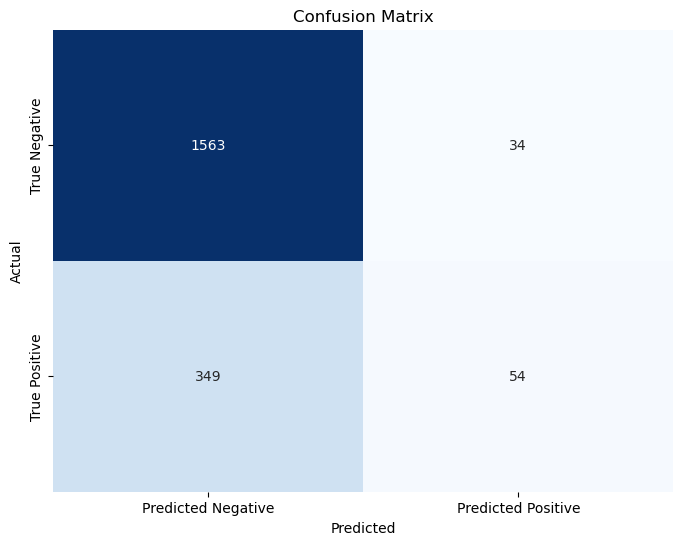

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# For regression analysis, define features and targets
X = churn_data[variables_to_analyze] # Features
y = churn_data['Exited'] # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Fit the model to the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report_result)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()